<a href="https://colab.research.google.com/github/alizul01/2141720088-PCVK-2023/blob/main/07_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision Filtering

## Library Importer

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import math
from PIL import Image

## Method

In [37]:
def load_image(file_path):
    img = cv.imread(file_path)
    return cv.cvtColor(img, cv.COLOR_BGR2RGB)

def conv2D(image, kernel, strides=1, padding=0):
  """
  Fungsi untuk melakukan konvolusi terhadap gambar 3 channel

  Return:
  ndarray


  """
  kernel = np.flipud(np.fliplr(kernel))
  xKernelShape = kernel.shape[0]
  yKernelShape = kernel.shape[1]
  xImageShape = image.shape[0]
  yImageShape = image.shape[1]

  xOutput = int(((xImageShape - xKernelShape + 2 * padding) / strides) + 1)
  yOutput = int(((yImageShape - yKernelShape + 2 * padding) / strides) + 1)

  output = np.zeros((xOutput, yOutput, image.shape[2]))

  if padding != 0:
    imagePadding = np.zeros((xImageShape + padding * 2, yImageShape + padding * 2, image.shape[2]))
    imagePadding[int(padding) : int(-1 * padding), int(padding) : int(-1 * padding)] = image
  else:
    imagePadding = image

  for y in range(yImageShape):
    if y > yImageShape - yKernelShape:
      break

    if y % strides == 0:
      for x in range(xImageShape):
        if x > xImageShape - xKernelShape:
          break
        try:
          if x % strides == 0:
            for channel in range(image.shape[2]):
              output[x, y, channel] = (kernel * imagePadding[x: x + xKernelShape, y: y + yKernelShape, channel]).sum()
        except:
          break
  return output

## Kernel Area

In [40]:
sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0,-1,0]])
emboss = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
left_sobel_edge_detection = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
canny_edge_detection = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
prewitt_edge_detection = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

gaussian_blur_5x = np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
])
gaussian_blur_5x = gaussian_blur_5x / gaussian_blur_5x.sum()

kernel_array = [sharpen, emboss, left_sobel_edge_detection, canny_edge_detection, prewitt_edge_detection, gaussian_blur_5x]

## Filtering

In [38]:
image = cv.imread('./female.tiff')

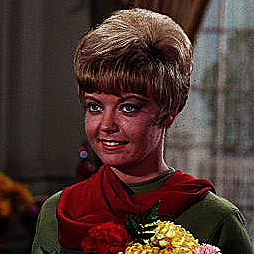

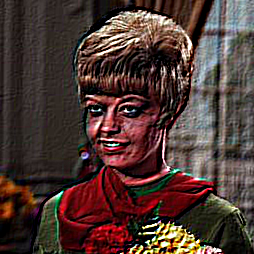

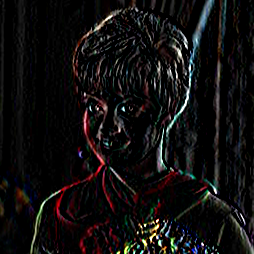

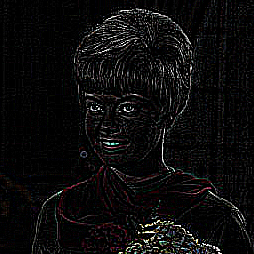

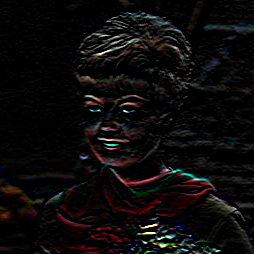

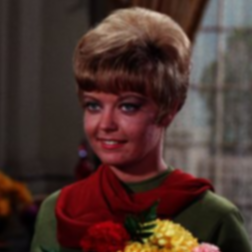

In [41]:
for i in range(len(kernel_array)):
  output = conv2D(image, kernel_array[i])
  cv2_imshow(output)

## KTP Dataset

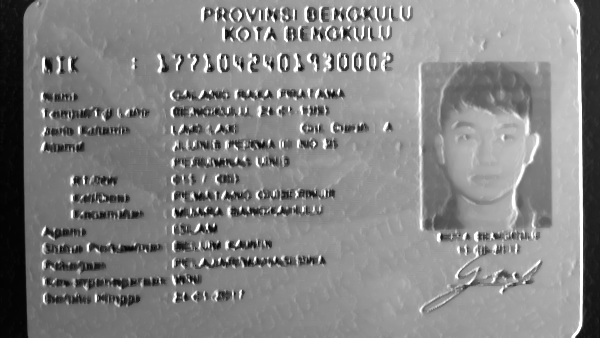

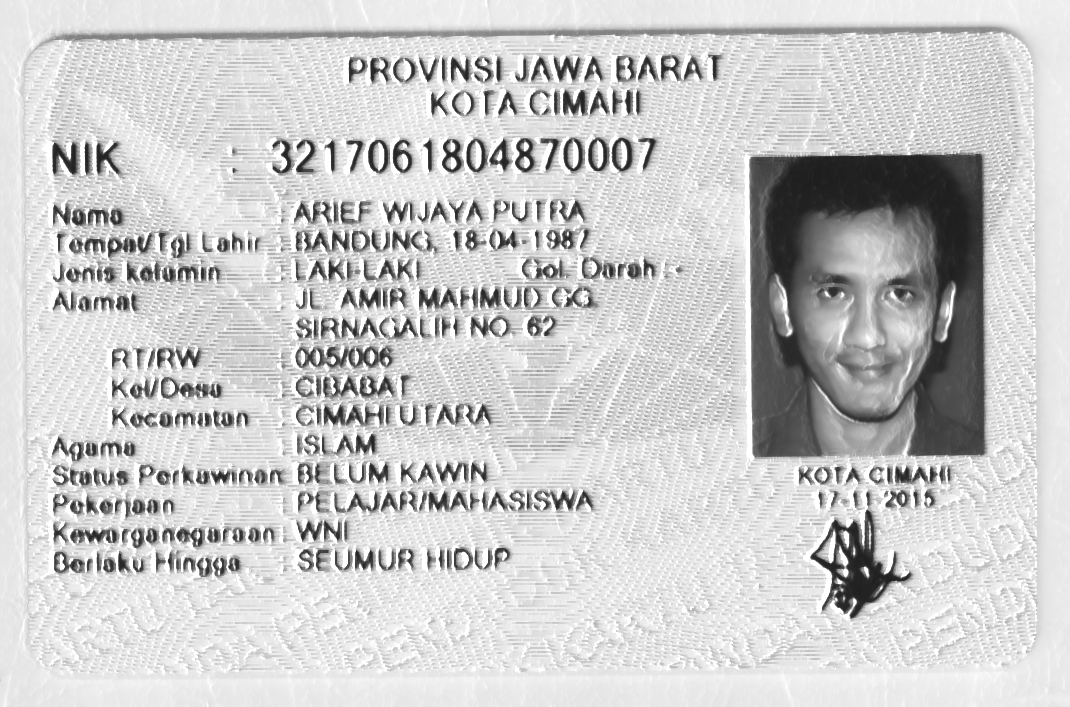

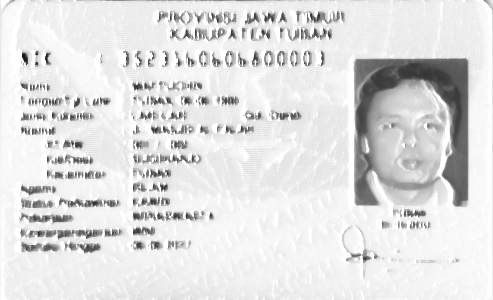

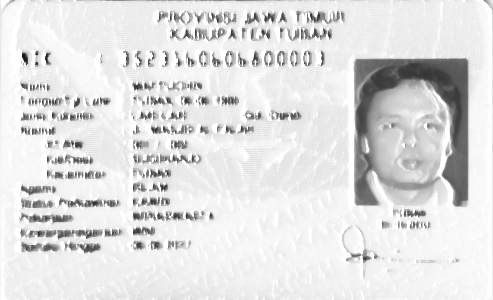

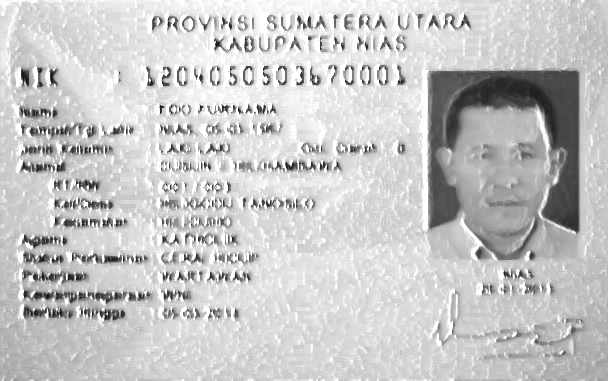

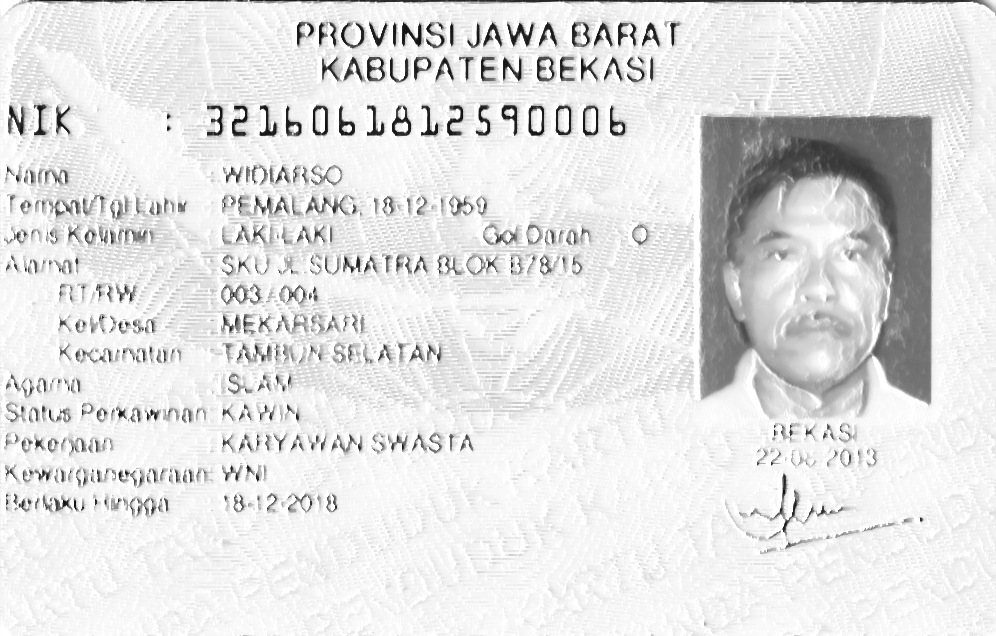

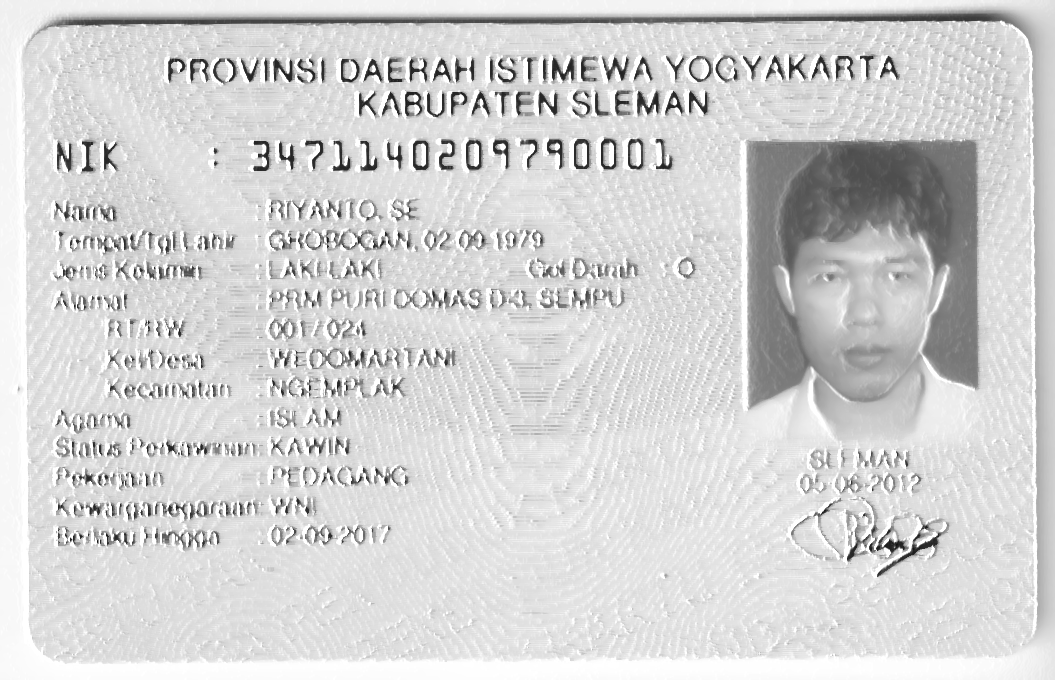

In [51]:
ktp_files = ['ktp1', 'ktp2', 'ktp3', 'ktp4', 'ktp5', 'ktp6', 'ktp7']

for file in ktp_files:
    img = cv.imread(file + '.png')
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    filtered = cv.medianBlur(gray, 5)

    edges = cv.filter2D(filtered, -1, kernel=left_sobel_edge_detection)
    equalized = cv.equalizeHist(filtered)
    result = cv.add(filtered, edges)

    cv.imwrite(img=filtered, filename=f"{file}-filtered.png")
    cv2_imshow(result)

## Experiment

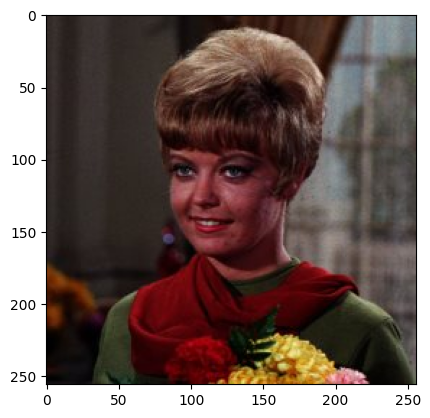

In [44]:
img = load_image('./female.tiff')
plt.imshow(img)